In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Data Loading:

In [2]:
df=pd.read_excel('/content/Electronic.xlsx')

In [3]:
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


In [4]:
df.shape

(5000, 15)

Cecking for missing values and imputing the same:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [6]:
#unique values of each column where datatype is object
df.select_dtypes('object').nunique()


,0
Gender,3
Region,4
Product Category,5
Payment Method,5
Preferred Visit Time,3


In [7]:
#unique values of each column where datatype is not object
df.select_dtypes(exclude='object').nunique()


,0
Age,52
Items Purchased,14
Total Spent,5000
Discount (%),4417
Satisfaction Score,2787
Warranty Extension,2
Revenue,5000
Store Rating,4997
Loyalty Score,4962
Membership Status,2


In [8]:
#selct the categorical columns
cat_cols=df.select_dtypes('object').columns
num_cols=df.select_dtypes(exclude='object').columns

In [9]:
num_cols1=df.select_dtypes(exclude='object').columns

In [10]:
num_cols1

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status'],
      dtype='object')

Checking for outliers

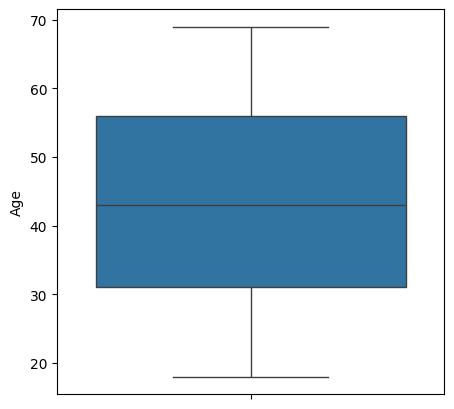

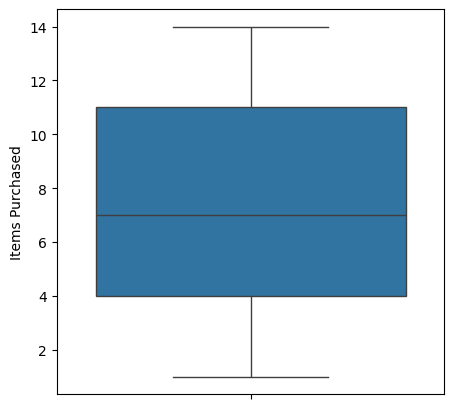

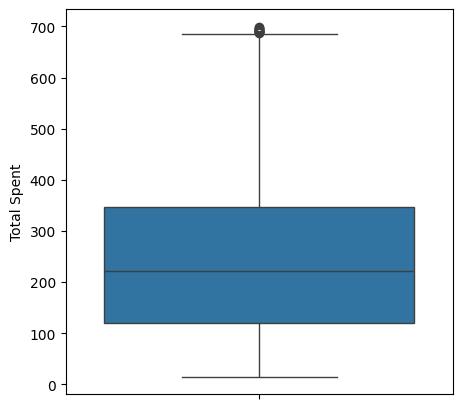

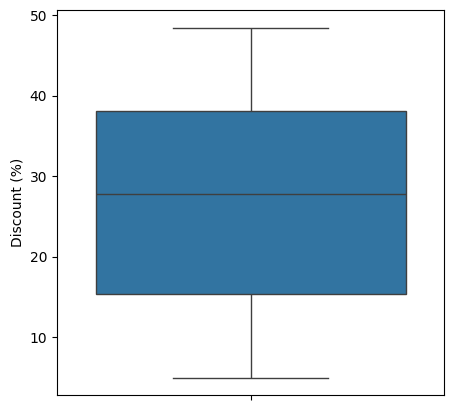

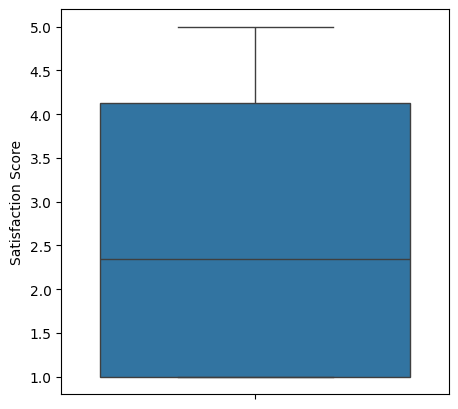

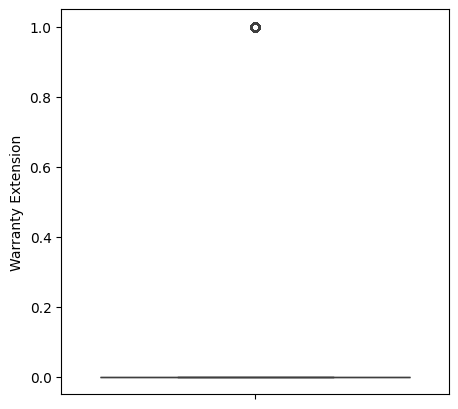

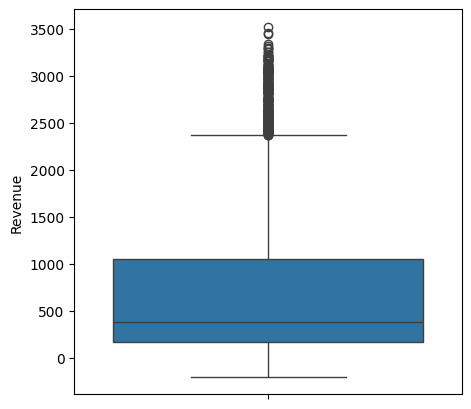

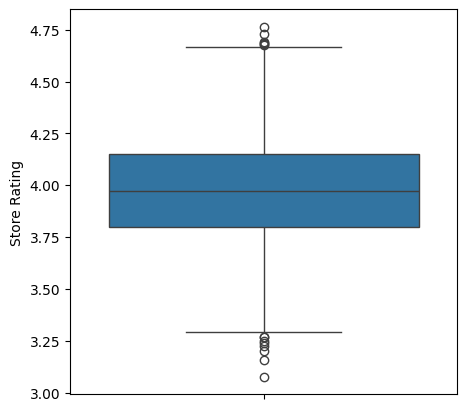

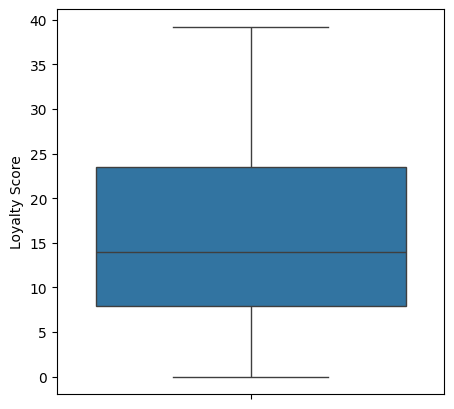

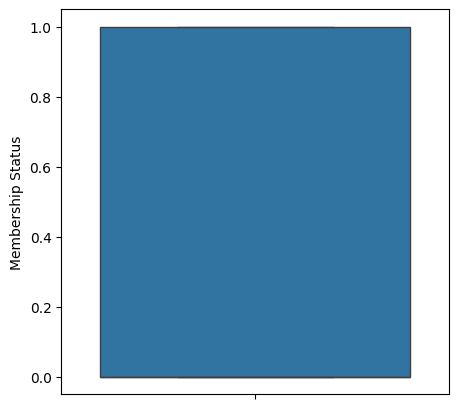

In [11]:
#loop for printing box plot for num_col1
for col in num_cols1:
  plt.figure(figsize=(5,5))
  sns.boxplot(df[col])
  plt.show()

In [12]:
#loop for printing unique vale in cat columns
for col in cat_cols:
  print(col)
  print(df[col].unique())

Gender
['Male' 'Female' 'Other' nan]
Region
['South' 'East' 'North' 'West']
Product Category
['Accessories' 'Laptop' 'Tablet' 'Television' 'Mobile']
Payment Method
['UPI' 'Cash' 'Credit Card' 'Net Banking' 'Debit Card' nan]
Preferred Visit Time
['Evening' 'Morning' 'Afternoon' nan]


In [13]:
#fill categoricqal column swith mode
for col in cat_cols:
  df[col].fillna(df[col].mode()[0],inplace=True)

<ipython-input-13-262d38b4dce7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                5000 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        5000 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  5000 non-null   object 
dtypes: float64(7), int64(

In [15]:
df['Membership Status'].unique()

array([ 1.,  0., nan])

In [16]:
#fill membership tats with mode
df['Membership Status'].fillna(df['Membership Status'].mode()[0],inplace=True)
#fill store rating with median
df['Store Rating'].fillna(df['Store Rating'].median(),inplace=True)

<ipython-input-16-c58b0e5f2649>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Membership Status'].fillna(df['Membership Status'].mode()[0],inplace=True)
<ipython-input-16-c58b0e5f2649>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                5000 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        5000 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          5000 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     5000 non-null   float64
 14  Preferred Visit Time  5000 non-null   object 
dtypes: float64(7), int64(

In [18]:
df.isnull().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


In [19]:
#loop for printing unique vale in cat columns
for col in cat_cols:
  print(col)
  print(df[col].unique())

Gender
['Male' 'Female' 'Other']
Region
['South' 'East' 'North' 'West']
Product Category
['Accessories' 'Laptop' 'Tablet' 'Television' 'Mobile']
Payment Method
['UPI' 'Cash' 'Credit Card' 'Net Banking' 'Debit Card']
Preferred Visit Time
['Evening' 'Morning' 'Afternoon']


In [20]:
df[num_cols]

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
0,56,1,29.226195,47.077380,1.000000,1,149.252145,3.660461,3.597133,1.0
1,69,10,420.142612,7.985739,3.760294,1,1485.524222,3.551553,25.764903,1.0
2,46,4,127.742817,37.225718,1.771240,1,85.550131,3.922839,7.022399,1.0
3,32,9,417.722683,8.227732,1.926831,0,824.118724,3.860422,7.635412,1.0
4,60,13,608.031366,5.000000,3.902927,0,2463.590392,3.812820,29.461119,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,24,1,39.583865,46.041614,1.000000,0,-64.457793,4.187345,9.136240,0.0
4996,66,5,172.486538,32.751346,1.000000,0,138.772917,3.868131,1.961965,0.0
4997,26,11,493.388104,5.000000,2.324783,0,1010.219124,4.172183,16.750489,0.0
4998,53,10,260.269589,23.973041,5.000000,1,1114.585926,3.942221,25.562475,1.0


In [21]:
df['Membership Status'].unique()

array([1., 0.])

In [22]:
#change datatype of member ship status to int
df['Membership Status']=df['Membership Status'].astype('int')

In [23]:
df['Membership Status'].unique()

array([1, 0])

In [24]:
float_cols=df.select_dtypes('float').columns
float_cols

Index(['Total Spent', 'Discount (%)', 'Satisfaction Score', 'Revenue',
       'Store Rating', 'Loyalty Score'],
      dtype='object')

In [25]:
#round the number of decimal places to 2 for flaot type
df[float_cols]=df[float_cols].round(2)

In [26]:
df[num_cols]

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
0,56,1,29.23,47.08,1.00,1,149.25,3.66,3.60,1
1,69,10,420.14,7.99,3.76,1,1485.52,3.55,25.76,1
2,46,4,127.74,37.23,1.77,1,85.55,3.92,7.02,1
3,32,9,417.72,8.23,1.93,0,824.12,3.86,7.64,1
4,60,13,608.03,5.00,3.90,0,2463.59,3.81,29.46,0
...,...,...,...,...,...,...,...,...,...,...
4995,24,1,39.58,46.04,1.00,0,-64.46,4.19,9.14,0
4996,66,5,172.49,32.75,1.00,0,138.77,3.87,1.96,0
4997,26,11,493.39,5.00,2.32,0,1010.22,4.17,16.75,0
4998,53,10,260.27,23.97,5.00,1,1114.59,3.94,25.56,1


In [27]:
num_cols

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status'],
      dtype='object')

 Distribution of Satisfaction scores and  Loyalty scores with histogram and boxplots:


*************** Satisfaction Score ***************

count    5000.000000
mean        2.650066
std         1.533395
min         1.000000
25%         1.000000
50%         2.340000
75%         4.130000
max         5.000000
Name: Satisfaction Score, dtype: float64


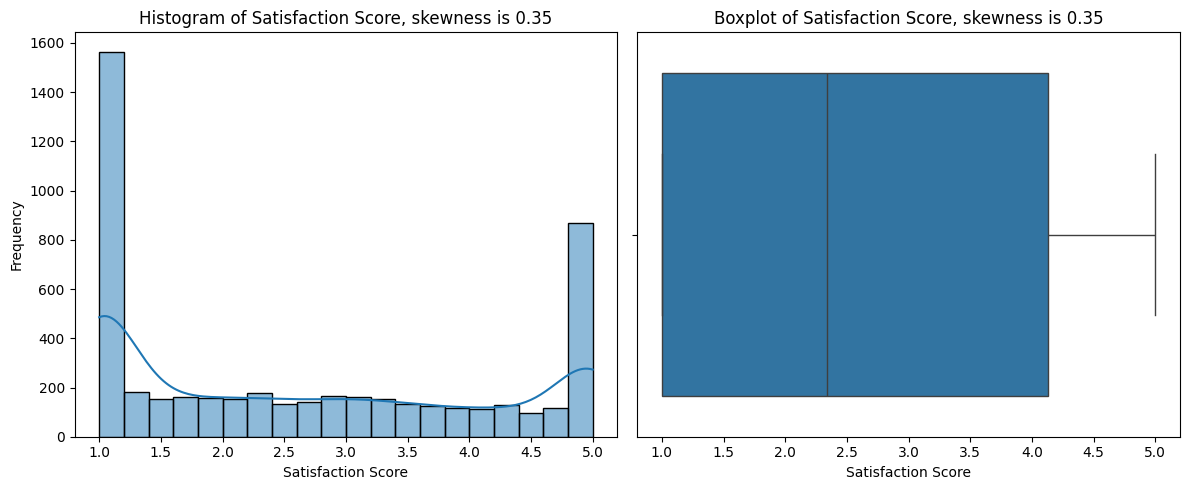


*************** Loyalty Score ***************

count    5000.000000
mean       15.638264
std         9.144715
min         0.000000
25%         7.947500
50%        13.970000
75%        23.520000
max        39.240000
Name: Loyalty Score, dtype: float64


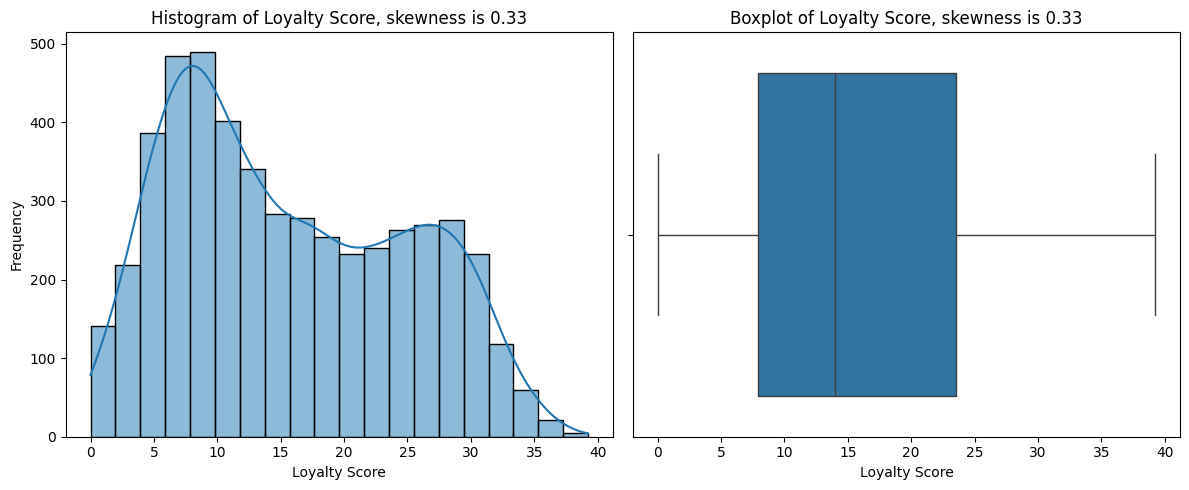

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def num_summary(dataframe, numerical_col):
    print('\n***************', numerical_col, '***************\n')
    print(dataframe[numerical_col].describe())

def univariate_plots(dataframe, numerical_cols):
    for col in numerical_cols:
        # Call num_summary to print statistics
        num_summary(dataframe, col)

        # Create a figure for the histogram
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=20, kde=True)
        plt.title(f'Histogram of {col}, skewness is {round(dataframe[col].skew(), 2)}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=dataframe[col])
        plt.title(f'Boxplot of {col}, skewness is {round(dataframe[col].skew(), 2)}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

# List of numerical columns to plot
num_cols = ['Satisfaction Score','Loyalty Score']

# Generate univariate plots
univariate_plots(df, num_cols)

Distribution of preferred visit times and other catogorical varibale:

        Gender  Ratio
Gender               
Male      2448  48.96
Female    2371  47.42
Other      181   3.62
##########################################


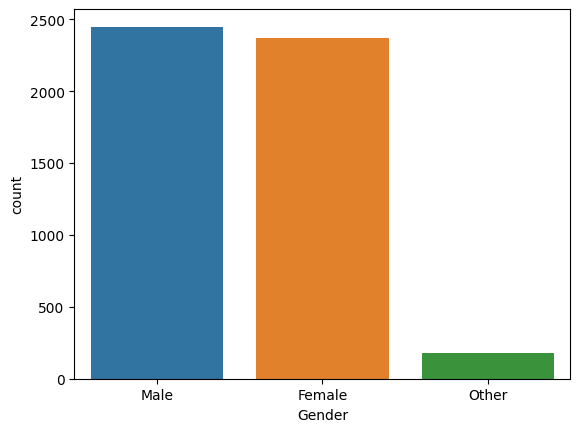

        Region  Ratio
Region               
South     1310  26.20
West      1281  25.62
East      1208  24.16
North     1201  24.02
##########################################


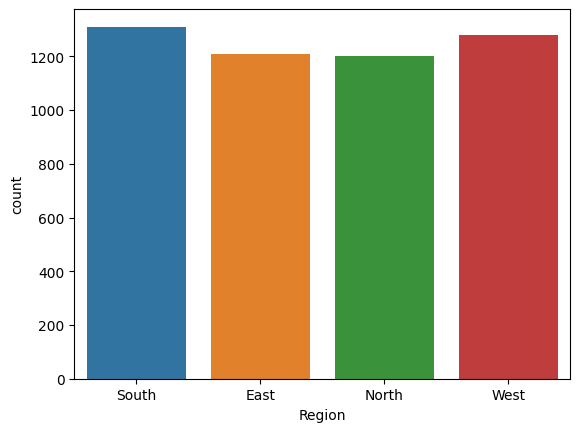

                  Product Category  Ratio
Product Category                         
Accessories                   1015  20.30
Laptop                        1013  20.26
Tablet                         997  19.94
Television                     991  19.82
Mobile                         984  19.68
##########################################


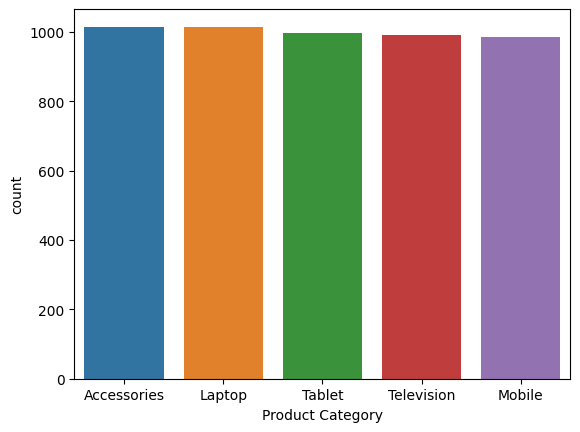

                Payment Method  Ratio
Payment Method                       
Net Banking               1042  20.84
Cash                      1015  20.30
Credit Card               1011  20.22
Debit Card                 980  19.60
UPI                        952  19.04
##########################################


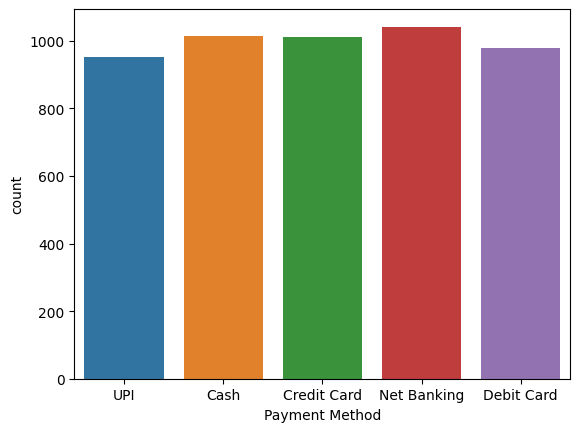

                      Preferred Visit Time  Ratio
Preferred Visit Time                             
Morning                               1680   33.6
Evening                               1660   33.2
Afternoon                             1660   33.2
##########################################


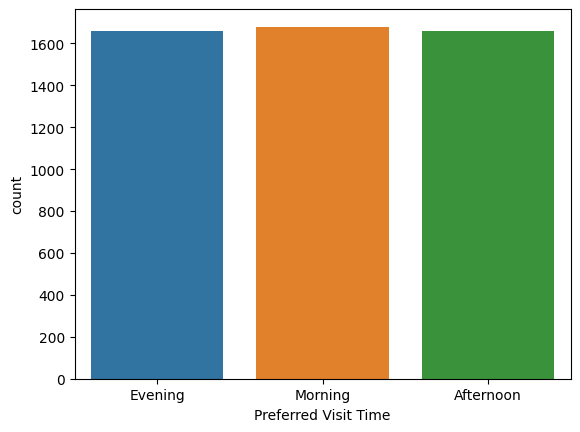

In [29]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        #fig, ax = plt.subplots(figsize=(4, 5))
        sns.countplot(x=dataframe[col_name], data=dataframe,hue=col_name)
        plt.show(block=True)
for col in cat_cols:
    cat_summary(df, col, plot=True)

**BIVARATE ANAYSIS:Impact of discrte numerical variable on loyalty and satisfaction score**

Visualization methods

In [30]:
## Items purchased with respect to Loyalty score

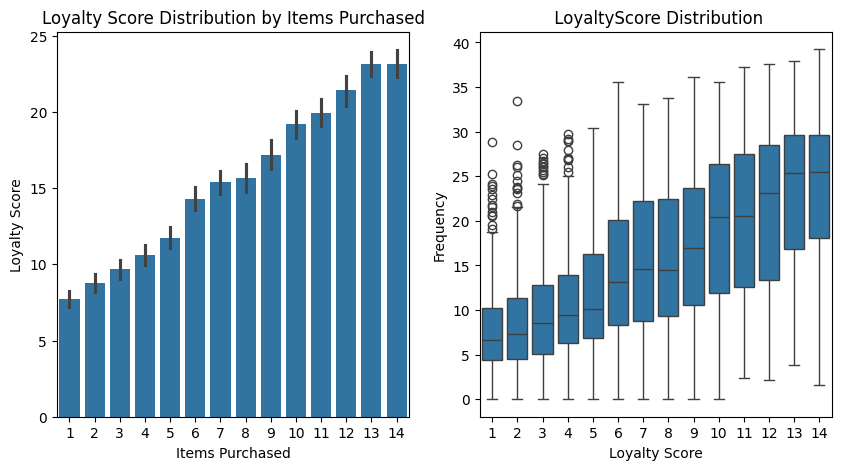

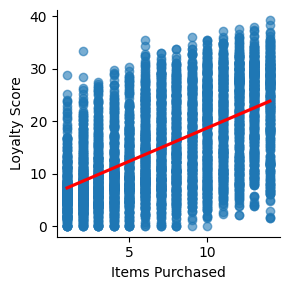

In [31]:
# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# 1st Plot: Scatter Plot (Loyalty Score vs. 'Items Purchased')
'''sns.scatterplot(x='Items Purchased',y='Loyalty Score',data=df,ax=axs[0], alpha=0.6)
axs[0].set_title("Loyalty Score vs. Items Purchased")
axs[0].set_xlabel("Items Purchased")
axs[0].set_ylabel("Loyalty Score")'''

# 2nd Plot: Box Plot (Income Distribution for each Number of Cars Owned)
sns.barplot(x='Items Purchased',y='Loyalty Score',data=df,ax=axs[0])
axs[0].set_title("Loyalty Score Distribution by Items Purchased")
axs[0].set_xlabel("Items Purchased")
axs[0].set_ylabel("Loyalty Score")

# 3rd Plot: Histogram of Income
sns.boxplot(x='Items Purchased',y='Loyalty Score',data=df,ax=axs[1])
axs[1].set_title(" LoyaltyScore Distribution")
axs[1].set_xlabel("Loyalty Score")
axs[1].set_ylabel("Frequency")

sns.lmplot(x='Items Purchased', y='Loyalty Score', data=df, aspect=1, height=3, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
'''axs[0].set_title("Loyalty Score vs. Store Rating")
axs[0].set_xlabel("Items Purchased")
axs[0].set_ylabel("Loyalty Score")'''

# Adjust layout to make sure the plots fit without overlapping
plt.tight_layout()

# Show the plots
plt.show()



In [32]:
## Items Purchased  with respect to Satisfaction score

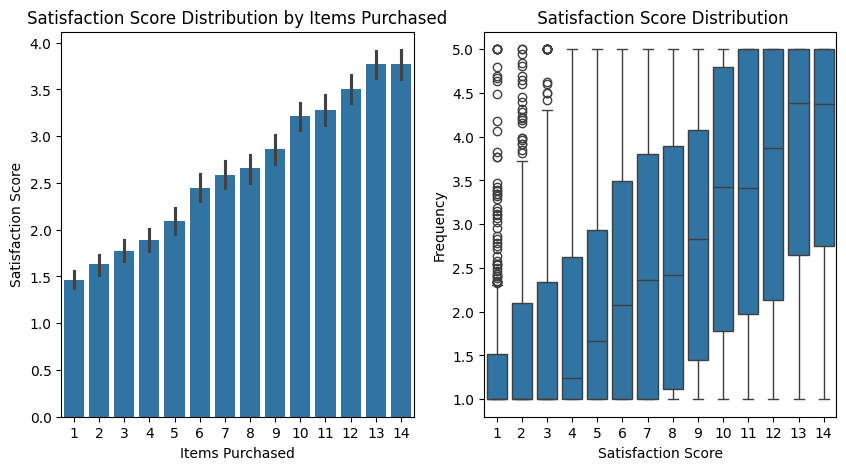

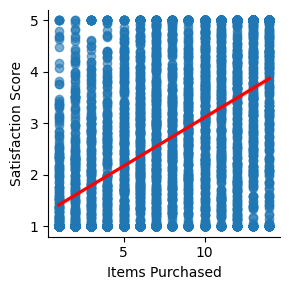

In [33]:
# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# 1st Plot: Scatter Plot ('Satisfaction Score' vs. 'Items Purchased')
'''sns.scatterplot(x='Items Purchased',y='Satisfaction Score',data=df,ax=axs[0], alpha=0.6)
axs[0].set_title(" Satisfaction Score vs. Items Purchased")
axs[0].set_xlabel("Items Purchased")
axs[0].set_ylabel("Satisfaction Score")'''

# 2nd Plot: Box Plot (Income Distribution for each Number of Cars Owned)
sns.barplot(x='Items Purchased',y='Satisfaction Score',data=df,ax=axs[0])
axs[0].set_title("Satisfaction Score Distribution by Items Purchased")
axs[0].set_xlabel("Items Purchased")
axs[0].set_ylabel("Satisfaction Score")

# 3rd Plot: Histogram of Income
sns.boxplot(x='Items Purchased',y='Satisfaction Score',data=df,ax=axs[1])
axs[1].set_title(" Satisfaction Score Distribution")
axs[1].set_xlabel("Satisfaction Score")
axs[1].set_ylabel("Frequency")

sns.lmplot(x='Items Purchased', y='Satisfaction Score', data=df, aspect=1, height=3, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})

# Adjust layout to make sure the plots fit without overlapping
plt.tight_layout()

# Show the plots
plt.show()


Inferrence:From visualization  items purchased seesm to be positively correlated to the satisfaction score and Loyalty score

In [34]:
#Using correlation technique
df1=df[['Items Purchased','Loyalty Score','Satisfaction Score']]
df1.corr()

,Items Purchased,Loyalty Score,Satisfaction Score
Items Purchased,1.000000,0.557785,0.494556
Loyalty Score,0.557785,1.000000,0.935090
Satisfaction Score,0.494556,0.935090,1.000000


Inferrence:Statistical methods is also corroborating the positive correlation

**For studying the effect of continous numerical varables viz ('Total Spent','Discount (%)','Revenue', 'Store Rating',  on Satisfaction /Loyalty score we are depending on on scattaer plot as the visualizatiomn method and correlation as a statistical method**

In [35]:
## impact on Loyalty score######

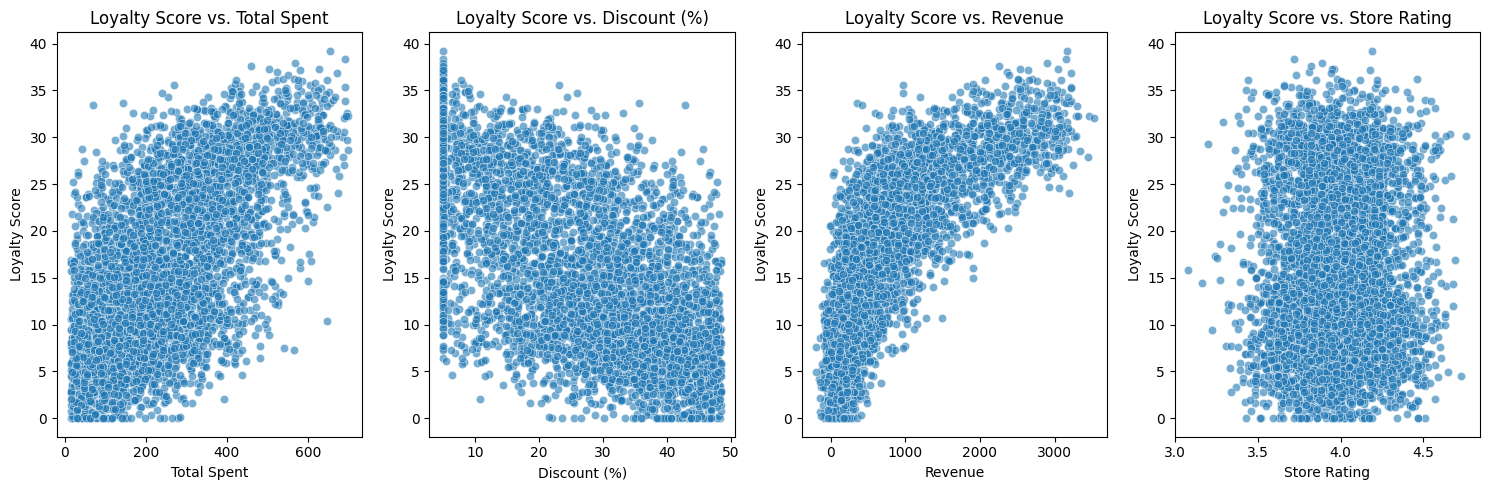

In [36]:
# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
# 1st Plot: Scatter Plot (Loyalty Score vs. 'Total Spent')
sns.scatterplot(x='Total Spent',y='Loyalty Score',data=df,ax=axs[0], alpha=0.6)
axs[0].set_title("Loyalty Score vs. Total Spent")
axs[0].set_xlabel("Total Spent")
axs[0].set_ylabel("Loyalty Score")

# 2 nd Plot: Scatter Plot (Loyalty Score vs. 'Discount (%)')
sns.scatterplot(x='Discount (%)',y='Loyalty Score',data=df,ax=axs[1], alpha=0.6)
axs[1].set_title("Loyalty Score vs. Discount (%)")
axs[1].set_xlabel("Discount (%)")
axs[1].set_ylabel("Loyalty Score")

# 3rd Plot: Scatter Plot (Loyalty Score vs. 'Revenue')
sns.scatterplot(x='Revenue',y='Loyalty Score',data=df,ax=axs[2], alpha=0.6)
axs[2].set_title("Loyalty Score vs. Revenue")
axs[2].set_xlabel("Revenue")
axs[2].set_ylabel("Loyalty Score")

# 4th Plot: Scatter Plot (Loyalty Score vs. 'Store Rating')
sns.scatterplot(x='Store Rating',y='Loyalty Score',data=df,ax=axs[3], alpha=0.6)
axs[3].set_title("Loyalty Score vs. Store Rating")
axs[3].set_xlabel("Store Rating")
axs[3].set_ylabel("Loyalty Score")


''' 2nd Plot: Box Plot (Income Distribution for each Number of Cars Owned)
sns.barplot(x='Total Spent',y='Loyalty Score',data=df,ax=axs[1])
axs[1].set_title("Loyalty Score Distribution by Total Spent")
axs[1].set_xlabel("Total Spent")
axs[1].set_ylabel("Loyalty Score")

# 3rd Plot: Histogram of Income
sns.boxplot(x='Total Spent',y='Loyalty Score',data=df,ax=axs[2])
axs[2].set_title(" LoyaltyScore Distribution")
axs[2].set_xlabel("Loyalty Score")
axs[2].set_ylabel("Frequency")'''

# Adjust layout to make sure the plots fit without overlapping
plt.tight_layout()

# Show the plots
plt.show()

Inferrrence:Total spent and Revenue seems to hav a positive correlation with Loyalty score where as Discount seems to have a negative correlation.Store rating doesnt seems to have a correaltion with Loyalty score

Correaltion ::

In [37]:
#select items purchased,total spent ,loyalty score and satisfaction scorer
df1=df[['Total Spent','Discount (%)','Revenue', 'Store Rating','Loyalty Score']]
df1.corr()

,Total Spent,Discount (%),Revenue,Store Rating,Loyalty Score
Total Spent,1.000000,-0.979015,0.882421,0.013680,0.669715
Discount (%),-0.979015,1.000000,-0.829426,-0.013820,-0.659180
Revenue,0.882421,-0.829426,1.000000,0.011030,0.808506
Store Rating,0.013680,-0.013820,0.011030,1.000000,0.007387
Loyalty Score,0.669715,-0.659180,0.808506,0.007387,1.000000


The statistical methos is corroborating the findings that Total spent and Revenue seems to hav a positive correlation(0.66 and 0.80)  with Loyalty score where as Discount seems to have a negative correlation(-0.65).Store rating doesnt seems to have a correaltion with Loyalty score(0.007)

In [38]:
## impact on Satisfaction Score######


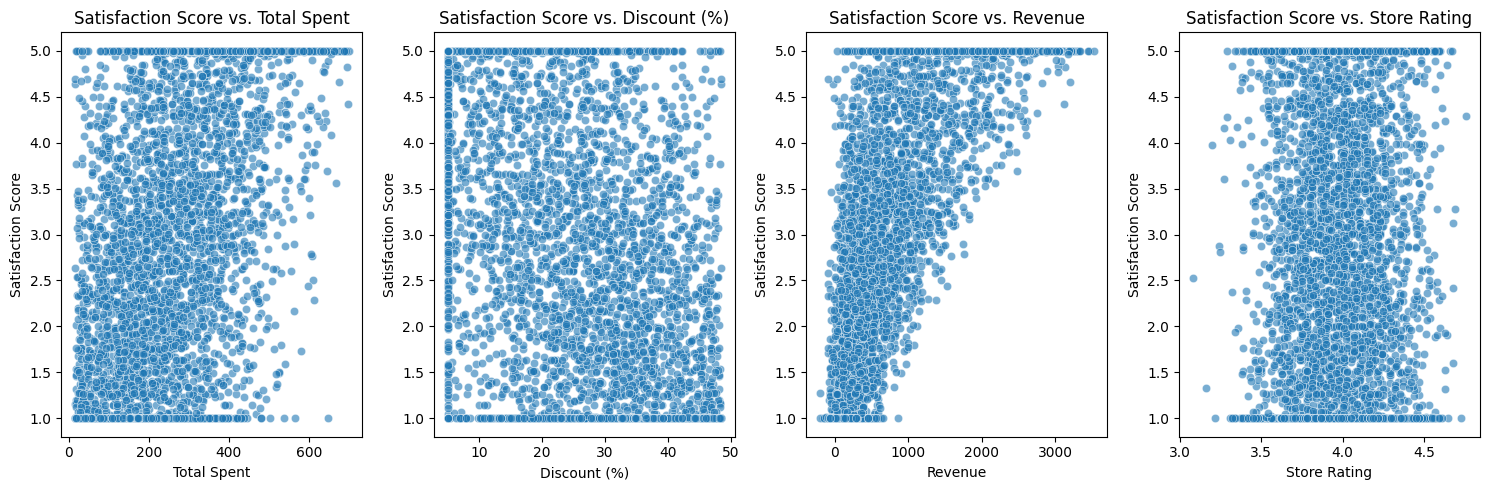

In [39]:
# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
# 1st Plot: Scatter Plot (Satisfaction Score vs. 'Total Spent')
sns.scatterplot(x='Total Spent',y='Satisfaction Score',data=df,ax=axs[0], alpha=0.6)
axs[0].set_title("Satisfaction Score vs. Total Spent")
axs[0].set_xlabel("Total Spent")
axs[0].set_ylabel("Satisfaction Score")

# 2 nd Plot: Scatter Plot (Satisfaction Score vs. 'Discount (%)')
sns.scatterplot(x='Discount (%)',y='Satisfaction Score',data=df,ax=axs[1], alpha=0.6)
axs[1].set_title("Satisfaction Score vs. Discount (%)")
axs[1].set_xlabel("Discount (%)")
axs[1].set_ylabel("Satisfaction Score")

# 3rd Plot: Scatter Plot (Satisfaction Score vs. 'Revenue')
sns.scatterplot(x='Revenue',y='Satisfaction Score',data=df,ax=axs[2], alpha=0.6)
axs[2].set_title("Satisfaction Score vs. Revenue")
axs[2].set_xlabel("Revenue")
axs[2].set_ylabel("Satisfaction Score")



#4th Plot: Scatter Plot (Satisfaction Score vs. 'Store Rating')
sns.scatterplot(x='Store Rating',y='Satisfaction Score',data=df,ax=axs[3], alpha=0.6)
axs[3].set_title("Satisfaction Score vs. Store Rating")
axs[3].set_xlabel("Store Rating")
axs[3].set_ylabel("Satisfaction Score")


# Adjust layout to make sure the plots fit without overlapping
plt.tight_layout()

# Show the plots
plt.show()

As it seems not easy to deduct from this we are going for Seaborn's lmplot()
 that fits a linear regression line to the data and shows the relationship .

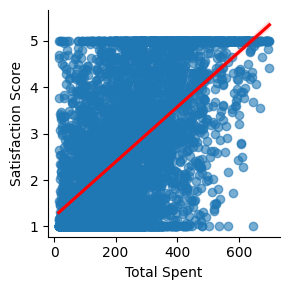

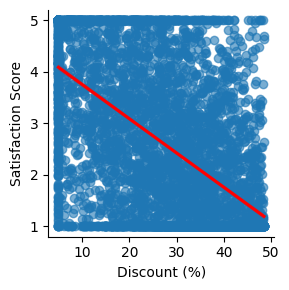

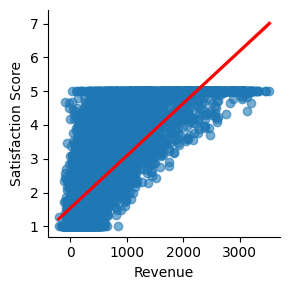

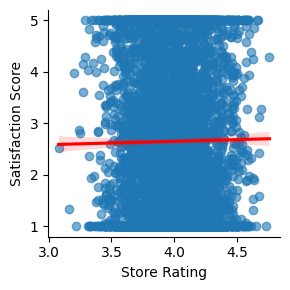

In [40]:
# 1st Plot: Scatter Plot (Satisfaction Score vs. 'Total Spent')
sns.lmplot(x='Total Spent', y='Satisfaction Score', data=df, aspect=1, height=3, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
axs[0].set_title("Satisfaction Score vs. Items Purchased")
axs[0].set_xlabel("Total Spent")
axs[0].set_ylabel("Satisfaction Score")

# 2 nd Plot: Scatter Plot (Satisfaction Score vs. 'Discount (%)')
sns.lmplot(x='Discount (%)', y='Satisfaction Score', data=df, aspect=1, height=3, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
axs[1].set_title("Satisfaction Score vs. Discount (%)")
axs[1].set_xlabel("Discount (%)")
axs[1].set_ylabel("Satisfaction Score")

# 3rd Plot: Scatter Plot (Satisfaction Score vs. 'Revenue')
sns.lmplot(x='Revenue', y='Satisfaction Score', data=df, aspect=1, height=3, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
axs[2].set_title("Satisfaction Score vs. Revenue")
axs[2].set_xlabel("Revenue")
axs[2].set_ylabel("Satisfaction Score")



#4th Plot: Scatter Plot (Satisfaction Score vs. 'Store Rating')
sns.lmplot(x='Store Rating', y='Satisfaction Score', data=df, aspect=1, height=3, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
axs[3].set_title("Satisfaction Score vs. Store Rating")
axs[3].set_xlabel("Store Rating")
axs[3].set_ylabel("Satisfaction Score")


# Adjust layout to make sure the plots fit without overlapping
plt.tight_layout()

# Show the plots
plt.show()



Inferrrence:Total spent and Revenue seems to have a positive correlation with Satisfaction  score where as Discount seems to have a negative correlation.Store rating doesnt seems to have a correaltion with atisfaction score

In [41]:
#select items purchased,total spent ,loyalty score and satisfaction score
df1=df[['Total Spent','Discount (%)','Revenue', 'Store Rating','Satisfaction Score']]
df1.corr()

,Total Spent,Discount (%),Revenue,Store Rating,Satisfaction Score
Total Spent,1.000000,-0.979015,0.882421,0.013680,0.597234
Discount (%),-0.979015,1.000000,-0.829426,-0.013820,-0.589432
Revenue,0.882421,-0.829426,1.000000,0.011030,0.786226
Store Rating,0.013680,-0.013820,0.011030,1.000000,0.010707
Satisfaction Score,0.597234,-0.589432,0.786226,0.010707,1.000000


The statistical method is corroborating the findings that7880)  with Loyalty score where as Discount seems to have a negative correlation(-0.58).Store rating doesnt seems to have a correaltion with Loyalty score(0.010)

In [42]:
df.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time'],
      dtype='object')

In [43]:
#df groupby items purchased
df1=df.groupby('Items Purchased').agg({'Loyalty Score':'mean'})
df1

,Loyalty Score
Items Purchased,
1,7.695145
2,8.751598
3,9.665879
4,10.627826
5,11.737275
6,14.295509
7,15.411451
8,15.645693
9,17.201429


In [44]:
df.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time'],
      dtype='object')

Bivariate analysis of categorical varibales with Loyalty Score

In [45]:
cat_cols=['Gender', 'Region', 'Product Category', 'Payment Method',
       'Preferred Visit Time','Warranty Extension']


In [46]:
cat_cols

['Gender',
 'Region',
 'Product Category',
 'Payment Method',
 'Preferred Visit Time',
 'Warranty Extension']

Text(0.5, 1.0, 'Loyalty Score vs. Warranty Extension')

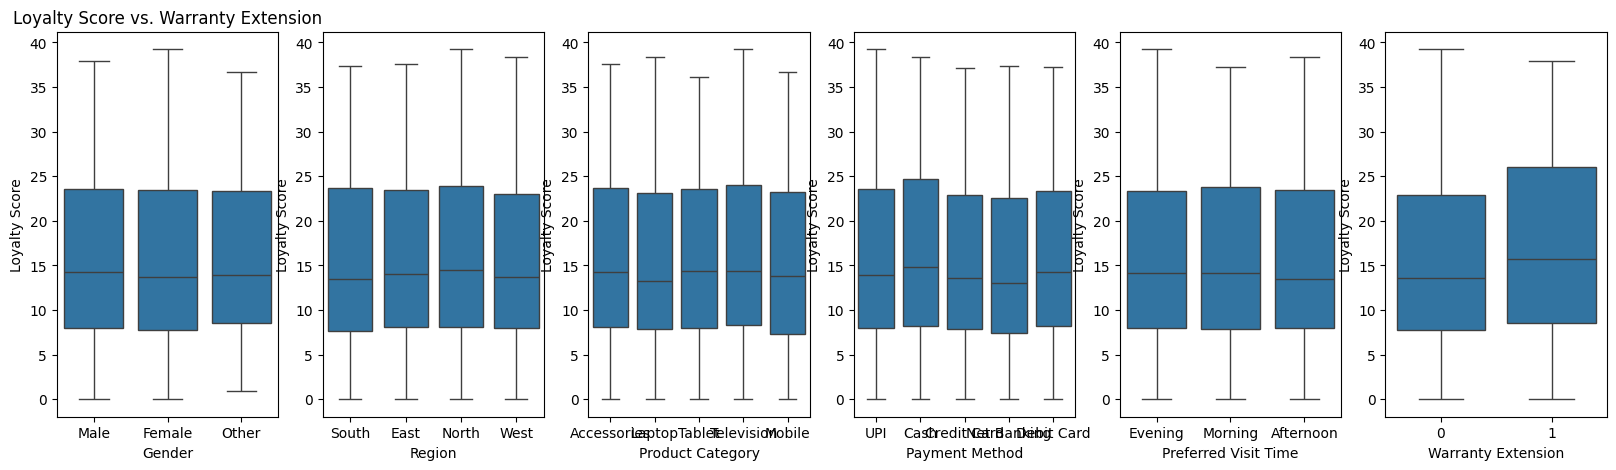

In [47]:
#box plot between Gender and Loyalty
# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
# 1st Plot: Box Plot (Loyalty Score vs. Gender)
sns.boxplot(x='Gender',y='Loyalty Score',data=df,ax=axs[0])
axs[0].set_title("Loyalty Score vs. Gender")
#axs[0].set_xlabel("Gender")
#axs[0].set_ylabel("Loyalty Score")
sns.boxplot(x='Region',y='Loyalty Score',data=df,ax=axs[1])
axs[0].set_title("Loyalty Score vs. Region")
sns.boxplot(x='Product Category',y='Loyalty Score',data=df,ax=axs[2])
axs[0].set_title("Loyalty Score vs. Product Category")
sns.boxplot(x='Payment Method',y='Loyalty Score',data=df,ax=axs[3])
axs[0].set_title("Loyalty Score vs. Payment Method")
sns.boxplot(x='Preferred Visit Time',y='Loyalty Score',data=df,ax=axs[4])
axs[0].set_title("Loyalty Score vs. Preferred Visit Time")
sns.boxplot(x='Warranty Extension',y='Loyalty Score',data=df,ax=axs[5])
axs[0].set_title("Loyalty Score vs. Warranty Extension")


Text(0.5, 1.0, 'Satisfaction Score vs. Warranty Extension')

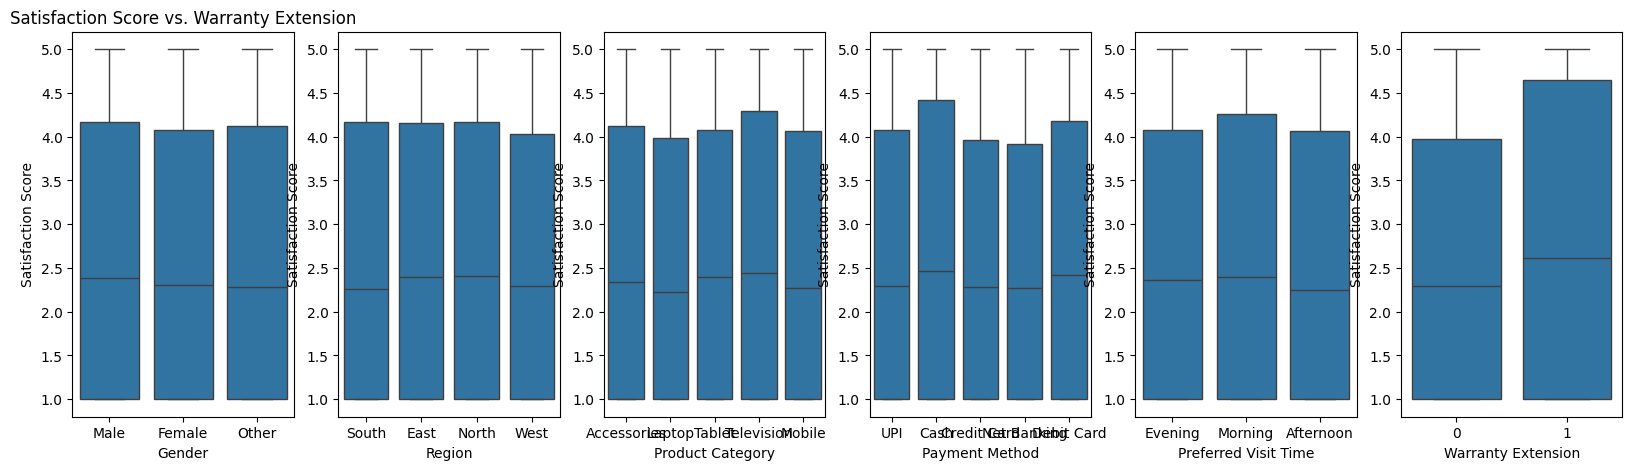

In [48]:
#box plot between Gender and Satisfaction Score
# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
# 1st Plot: Box Plot (Satisfaction Score vs. Gender)
sns.boxplot(x='Gender',y='Satisfaction Score',data=df,ax=axs[0])
axs[0].set_title("Satisfaction Score vs. Gender")
#axs[0].set_xlabel("Gender")
#axs[0].set_ylabel("Satisfaction Score")
sns.boxplot(x='Region',y='Satisfaction Score',data=df,ax=axs[1])
axs[0].set_title("Satisfaction Score vs. Region")
sns.boxplot(x='Product Category',y='Satisfaction Score',data=df,ax=axs[2])
axs[0].set_title("Satisfaction Score vs. Product Category")
sns.boxplot(x='Payment Method',y='Satisfaction Score',data=df,ax=axs[3])
axs[0].set_title("Satisfaction Score vs. Payment Method")
sns.boxplot(x='Preferred Visit Time',y='Satisfaction Score',data=df,ax=axs[4])
axs[0].set_title("Satisfaction Score vs. Preferred Visit Time")
sns.boxplot(x='Warranty Extension',y='Satisfaction Score',data=df,ax=axs[5])
axs[0].set_title("Satisfaction Score vs. Warranty Extension")

**SEGMENTATION of Customers based on region and product category:**

In [49]:
#Region wise number of customers and reghion wise mean of total spent,revenue,store rating,satisfactionnscore and Loyalty score

In [50]:
df2=df.groupby('Region').agg({'Region':'count','Total Spent':'mean','Satisfaction Score':'mean','Revenue':'mean','Store Rating':'mean','Loyalty Score':'mean'})
df2

,Region,Total Spent,Satisfaction Score,Revenue,Store Rating,Loyalty Score
Region,,,,,,
East,1208,240.857127,2.664901,707.234007,4.003369,15.726093
North,1201,248.839425,2.688943,745.622548,4.209692,15.910175
South,1310,244.950031,2.625237,729.502740,3.798733,15.462420
West,1281,240.369180,2.625020,690.484879,3.909094,15.480336


In [51]:
#groupy region then by perefeereds visi time
df3=df.groupby(['Region','Preferred Visit Time']).Age.count()
df3

Region  Preferred Visit Time
East    Afternoon               412
        Evening                 382
        Morning                 414
North   Afternoon               374
        Evening                 431
        Morning                 396
South   Afternoon               428
        Evening                 414
        Morning                 468
West    Afternoon               446
        Evening                 433
        Morning                 402
Name: Age, dtype: int64

In [52]:
#Product Category wise wise number of customers and  mean of total spent,revenue,store rating,satisfactionnscore and Loyalty score

In [53]:
df5=df.groupby('Product Category').agg({'Product Category':'count','Total Spent':'mean','Revenue':'mean'})
df5

,Product Category,Total Spent,Revenue
Product Category,,,
Accessories,1015,243.017990,724.910414
Laptop,1013,239.803425,680.012507
Mobile,984,242.764715,710.367409
Tablet,997,245.768375,723.132317
Television,991,247.339395,752.159324


In [54]:
pd.crosstab(df['Product Category'],df['Region'])

Region,East,North,South,West
Product Category,,,,
Accessories,254,230,269,262
Laptop,221,256,258,278
Mobile,233,234,292,225
Tablet,269,217,237,274
Television,231,264,254,242


Encoding the categoical varaibales:

In [55]:
cat_cols

['Gender',
 'Region',
 'Product Category',
 'Payment Method',
 'Preferred Visit Time',
 'Warranty Extension']

In [56]:
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.23,47.08,1.00,1,Male,South,Accessories,UPI,149.25,3.66,3.60,1,Evening
1,69,10,420.14,7.99,3.76,1,Female,South,Accessories,Cash,1485.52,3.55,25.76,1,Evening
2,46,4,127.74,37.23,1.77,1,Male,East,Laptop,Credit Card,85.55,3.92,7.02,1,Morning
3,32,9,417.72,8.23,1.93,0,Female,East,Tablet,UPI,824.12,3.86,7.64,1,Afternoon
4,60,13,608.03,5.00,3.90,0,Female,South,Tablet,UPI,2463.59,3.81,29.46,0,Morning


In [57]:
cat_cols1=['Gender',
 'Region',
 'Product Category',
 'Payment Method',
 'Preferred Visit Time']

In [58]:
cat_cols1

['Gender',
 'Region',
 'Product Category',
 'Payment Method',
 'Preferred Visit Time']

In [59]:
df1=df.copy()

In [60]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Region']=le.fit_transform(df1['Region'])
df1['Product Category']=le.fit_transform(df1['Product Category'])
df1['Payment Method']=le.fit_transform(df1['Payment Method'])



In [61]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df1['Gender']=le.fit_transform(df1['Gender'])
df1['Preferred Visit Time']=le.fit_transform(df1['Preferred Visit Time'])

In [62]:
df1.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.23,47.08,1.00,1,1,2,0,4,149.25,3.66,3.60,1,1
1,69,10,420.14,7.99,3.76,1,0,2,0,0,1485.52,3.55,25.76,1,1
2,46,4,127.74,37.23,1.77,1,1,0,1,1,85.55,3.92,7.02,1,2
3,32,9,417.72,8.23,1.93,0,0,0,3,4,824.12,3.86,7.64,1,0
4,60,13,608.03,5.00,3.90,0,0,2,3,4,2463.59,3.81,29.46,0,2


Standardising the numerical columns:

In [63]:
#minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1['Total Spent']=scaler.fit_transform(df1[['Total Spent']])
df1['Discount (%)']=scaler.fit_transform(df1[['Discount (%)']])
df1['Revenue']=scaler.fit_transform(df1[['Revenue']])
df1['Store Rating']=scaler.fit_transform(df1[['Store Rating']])
df1['Age']=scaler.fit_transform(df1[['Age']])
df1['Items Purchased']=scaler.fit_transform(df1[['Items Purchased']])

In [64]:
df1.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,0.745098,0.000000,0.020628,0.967579,1.00,1,1,2,0,4,0.094145,0.345238,3.60,1,1
1,1.000000,0.692308,0.591717,0.068751,3.76,1,0,2,0,0,0.452885,0.279762,25.76,1,1
2,0.549020,0.230769,0.164543,0.741090,1.77,1,1,0,1,1,0.077044,0.500000,7.02,1,2
3,0.274510,0.615385,0.588181,0.074270,1.93,0,0,0,3,4,0.275323,0.464286,7.64,1,0
4,0.823529,0.923077,0.866209,0.000000,3.90,0,0,2,3,4,0.715461,0.434524,29.46,0,2
